# [Day 3](https://adventofcode.com/2023/day/3)


In [1]:
%pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read inputs
with open("input") as f:
    input = [l.strip("\n") for l in f.readlines()]

print(len(input))

140


In [4]:
matrix = np.array([np.array(list(l)) for l in input])
matrix

array([['4', '8', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.'],
       ...,
       ['.', '.', '.', ..., '.', '.', '.'],
       ['6', '8', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.']], dtype='<U1')

In [5]:
# print(matrix.shape, matrix[0, 1:3].shape)
# ## Test
# matrix = np.array(
#     [
#         list("467..114.."),
#         list("...*......"),
#         list("..35..633."),
#         list("......#..."),
#         list("617*......"),
#         list(".....+.58."),
#         list("..592....."),
#         list("......755."),
#         list("...$.*...."),
#         list(".664.598.."),
#     ]
# )
# matrix, matrix.shape, matrix[0, 1:3].shape

In [6]:
symbols = "#%&*+-/=@$"
symbol_mask = np.isin(matrix, list(symbols))
symbol_positions = np.argwhere(symbol_mask)
neighborhood_slices = [
    np.s_[row - 1 : row + 2, col - 1 : col + 2] for row, col in symbol_positions
]

neighborhood_masks = [np.zeros_like(matrix, dtype=bool) for _ in symbol_positions]
for i, (row, col) in enumerate(symbol_positions):
    neighborhood_masks[i][row - 1 : row + 2, col - 1 : col + 2] = True
    neighborhood_masks[i][row, col] = False

symbol_neighborhood_mask = np.any(neighborhood_masks, axis=0)
symbol_neighborhood_number_mask = (matrix != ".") & symbol_neighborhood_mask

np.argwhere(symbol_neighborhood_number_mask)
# matrix[symbol_neighborhood_number_mask]

array([[  0,  19],
       [  0,  51],
       [  0,  52],
       ...,
       [139,  71],
       [139,  79],
       [139, 110]])

In [7]:
img = np.zeros((*matrix.shape, 3), dtype=np.uint8)
img[matrix != "."] = [0, 0, 225]
# for slice_ in neighborhood_slices:
#     img[slice_] = 2

img[symbol_neighborhood_mask] = [225, 0, 0]
img[symbol_neighborhood_number_mask] = [0, 0, 128]
img[symbol_mask] = [225, 225, 225]

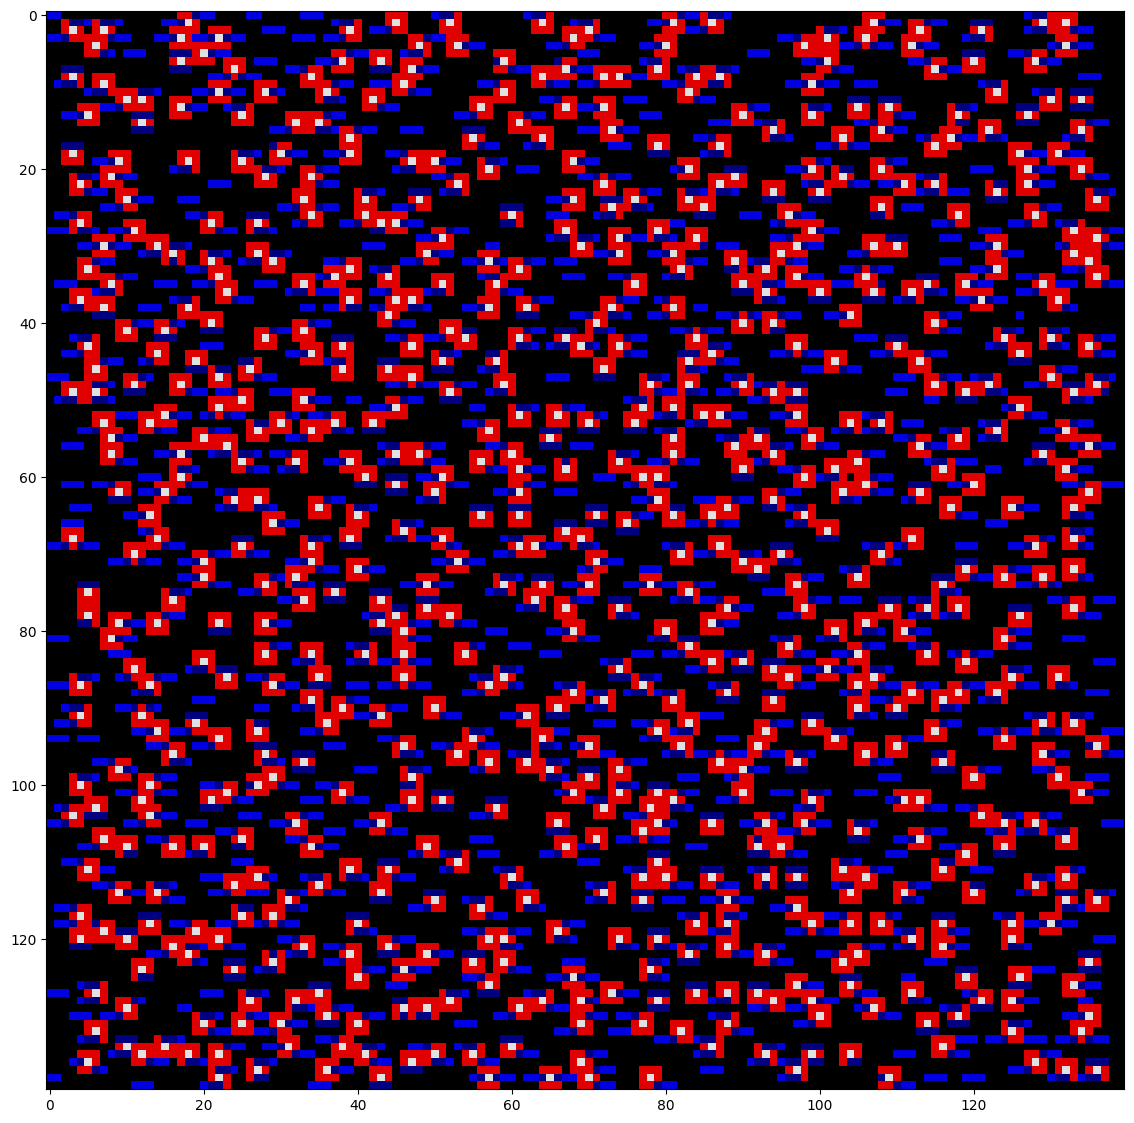

In [8]:
plt.figure(figsize=(14, 14))
plt.imshow(img, interpolation="nearest", cmap="grey")

In [9]:
matrix[0,0:2]

array(['4', '8'], dtype='<U1')

In [10]:
from types import NoneType


def get_whole_number_and_slices(matrix: np.ndarray[np.str_], coordinates: tuple):
    row, col = coordinates
    _, width = matrix.shape
    if ~np.char.isnumeric(matrix[row, col]):
        return -1, None

    ## find beginning of number;
    start_col = col
    while start_col > 0:
        val = matrix[row, start_col - 1]
        if ~np.char.isnumeric(val):
            break
        start_col = start_col - 1

    ## find end of number;
    end_col = col
    while end_col < width - 1:
        val = matrix[row, end_col + 1]
        if ~np.char.isnumeric(val):
            break
        end_col = end_col + 1
    slice = np.s_[row, start_col : end_col + 1]

    return int("".join(matrix[slice])), slice

In [11]:
print(matrix[8,9], matrix.shape)

. (140, 140)


In [12]:
test_1,s_1 =get_whole_number_and_slices(matrix, (0,0)) # should return 467
test_2,s_2 =get_whole_number_and_slices(matrix, (0,2)) # should return 467
test_3,s_3 =get_whole_number_and_slices(matrix, (0,3)) # should return None
test_4,s_4 =get_whole_number_and_slices(matrix, (2,3)) # should return 35
test_4,s_4 =get_whole_number_and_slices(matrix, (8,8)) # should return 60
print(test_1, test_2, test_3, test_4)
print(s_1 == s_2, s_2 == s_3,s_4)

48 -1 -1 -1
False True None


In [13]:
# Get all coordinates where symbol_neighborhood_number_mask is True
number_coordinates = np.argwhere(symbol_neighborhood_number_mask)

# Define a vectorized version of get_whole_number_and_slices
v_get_whole_number_and_slices = np.vectorize(get_whole_number_and_slices, signature='(n,m),(2)->(),()')
results = v_get_whole_number_and_slices(matrix, number_coordinates)

In [14]:
def filter_uniq_numbers(numbers: [int], slices: [np.s_]):
    unique_slices = set()
    filtered_results = []

    for number, slices in zip(numbers, slices):
        if (slices != None ):
        # Convert the slices to a hashable format (using string representation)
            hashable_slices = tuple(str(s) if s is not None else None for s in slices)

            # Check if the slice is unique
            if hashable_slices not in unique_slices:
                unique_slices.add(hashable_slices)
                filtered_results.append(number)
    return filtered_results

In [15]:
filtered_results = filter_uniq_numbers(results[0], results[1])
sum(filtered_results)

521601

## Part 2

In [16]:
star = "*"
star_mask = np.isin(matrix, list(star))
star_positions = np.argwhere(star_mask)
neighborhood_slices = [
    np.s_[row - 1 : row + 2, col - 1 : col + 2] for row, col in star_positions
]

nm = [np.zeros_like(matrix, dtype=bool) for _ in star_positions]
for i, (row, col) in enumerate(star_positions):
    nm[i][row - 1 : row + 2, col - 1 : col + 2] = True
    nm[i][row, col] = False

star_neighborhood_mask = np.any(nm, axis=0)
star_neighborhood_number_mask = (matrix != ".") & star_neighborhood_mask

# np.argwhere(star_neighborhood_number_mask)
# matrix[star_neighborhood_number_mask]

In [17]:
img = np.zeros((*matrix.shape, 3), dtype=np.uint8)
img[matrix != "."] = [0, 0, 225]

img[symbol_neighborhood_mask] = [225, 0, 0]
img[symbol_neighborhood_number_mask] = [0, 0, 128]
img[symbol_mask] = [225, 225, 0]

img[star_neighborhood_mask] = [128, 0, 0]
img[star_neighborhood_number_mask] = [0, 128, 0]
img[star_mask] = [0,255,255]

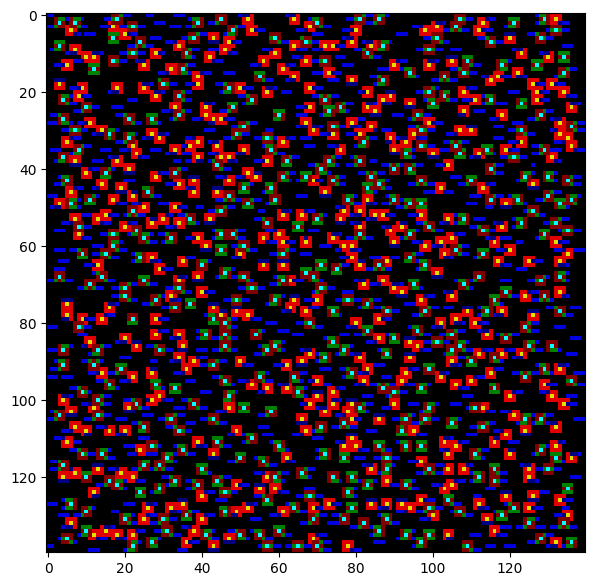

In [18]:
plt.figure(figsize=(7, 7))
plt.imshow(img, interpolation="nearest", cmap="grey")

In [19]:
def get_neighbors_coord(matrix: np.ndarray[np.str_], coordinates: tuple):
    row, col = coordinates
    def is_valid_coordinate(r, c):
        return 0 <= r < matrix.shape[0] and 0 <= c < matrix.shape[1]

    neighbors = []

    directions = [
        (-1, 0), (1, 0), (0, -1), (0, 1),
        (-1, -1), (-1, 1), (1, -1), (1, 1)
    ]

    for dr, dc in directions:
        new_row, new_col = row + dr, col + dc

        if is_valid_coordinate(new_row, new_col):
            # Exclude the center coordinate
            if not (new_row == coordinates[0] and new_col == coordinates[1]):
                neighbors.append((new_row, new_col))

    return np.array(neighbors)

v_get_neighbors_coord = np.vectorize(get_neighbors_coord, signature='(n,m),(2)->(p,q)')


In [35]:
mulRes = []
for pos in np.argwhere(star_mask):
  t= get_neighbors_coord(matrix, pos)
  res = v_get_whole_number_and_slices(matrix, t)
  val = filter_uniq_numbers(*res)
  if(len(val) > 1):
    # print(pos,len(val), np.multiply.reduce(val))
    mulRes.append(np.multiply.reduce(val))
sum(mulRes)

80694070